### This notebook reads in elevation data for the Medicine Bow Mountains in Southeast Wyoming and creates a contour map

In [1]:
#only using numpy, rasterio, and matplotlib
import numpy as np
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

first we will read in the digital elevation model using rasterio and assign it to variable e. We will change the float values to integers as well

In [2]:
with rasterio.open('medbows.tif') as src:
    e = src.read().astype(int)

let's see what the DEM looks like with a quick plot by matplotlib, we slice the array so we have the x and y coordinates in the right places

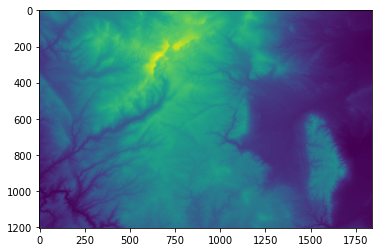

In [3]:
plt.imshow(e[0])

Then all it takes to make a contour map is to call the contour function in matplotlib

<a list of 21 text.Text objects>

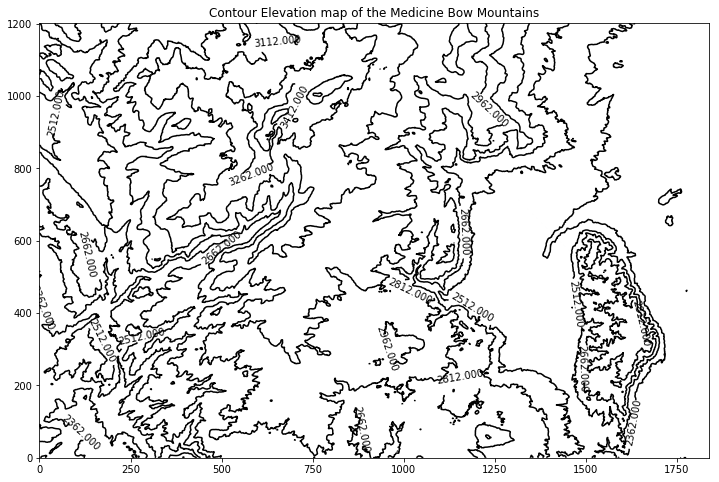

In [4]:
contour_interval = 150 #the contour interval variable controls the interval
fig = plt.figure(figsize = (12, 8)) #create our figure
ax = fig.add_subplot(111) #add our subplot to the figure

#this line does everything we need for the contour map
contours = plt.contour(np.flip(e[0],0), colors='k', levels = list(range(e[0].min(), e[0].max(), contour_interval))) 
#we have to flip the array otherwise it is upside down in the real world
#try it by removing the np.flip call and compare with the plot above
#we assign colors to black for all one color, then make a list of the contours we want
#the min and max calls can be changed to whatever you want
#the contour interval variable controls the interval
levels = list(range(e[0].min(), e[0].max(), contour_interval)) 
#this is a list of the labels for the contour plot
plt.title("Contour Elevation map of the Medicine Bow Mountains") #add a title
plt.clabel(contours, levels, fontsize=10, inline=True) #add some labels to the plot
